# Chemical encodings for Machine Learning - Methods and a coded example

**Dr. Christian Gierlich, Dr. Stefan Palkovits**<br/>
RWTH Aachen University<br/>
Institute for Technical and Macromolecular Chemistry<br/>
Worringerweg 2<br/>
52074 Aachen<br/>
E-mail: gierlich@itmc.rwth-aachen.de<br/>
E-mail: stefan.palkovits@itmc.rwth-aachen.de<br/>
Twitter: @PalkovitsLab<br/>

## Abstract

How to encode Chemistry is crucial when it is used as an input for a Machine Learning (ML) algorithm. In the article we present some of the most common featurization methods right now used in Chemistry and give a flavour when to use what. For people being new to ML in Chemistry or Chemical Engineering featurization is probably the first obstacle they have to challenge we will accompany this overview with a coded example on how to actually use featurization on a problem of the synthesis of Oxymethylene Ether (OME) and what difference even slight changes in the encoding can make.

## Introduction

Very often a Machine Learning project in Chemistry or maybe Chemical Engineering starts not with the question what is the best algorithm for the given problem but how to encode the molecules in the actual project. The possible encodings are not always straightforward in their respective use and it can happen that you choose an encoding that is not a good choice for the given problem. There might be obvious choices like taking the composition of a solid catalyst in heterogeneous catalysis but when only switching to homogeneous catalysis the challenge arises how to encode for example ligands or substrates. We will try to give first a non comprehensive overview what kinds of encodings are available as they might differ a lot from what is used in Machine Learning (ML) for more general tasks like picture classification and the deeper you dive into the subject the more specialized the encodings might get. Then we will give you an fully coded example where the outcome of the prediction of the ML algorithm will be influenced by the choice of the featurization method.

## Featurization methods, Molecular represetations

We collected some featurization methods in the following table and combined it with what see as a major use case and some literature examples to illustrate the use of the respective chemical encoding.

| Category | Featurization method                         | Main use case                                        | Example  |
|:---------|:---------------------------------------------|:-----------------------------------------------------|:---------|
| 1        | Available general feature e.g. composition   | Feature main factor of activity                      | [1, 2]   |
| 2        | String based features e.g. SMILES or SELFIES | Abstract encoding or functional groups are sufficient| [3, 4]   |
| 3        | Graph and NN based features                  | Molecular porperties                                 | [5, 6]   |
| 4        | Mol2Vec                                      | Molecular properties, molecular similarities         | [7]      |
| 5        | Coulomb matrices                             | Quantum Chemistry relations                          | [8, 9]   |
| 6        | Specialities                                 | Depends on the itended use                           | [10, 11] |

The methods differ a lot and the reason is mainly their respective use. For example methods based on SMILES are more often used in a general Chemistry perspective whereas the Coulomb Matrix is more specialized towards Computational Chemistry. We will present the methods from above with respect to their context in the next paragraphs.

### Available general features

Taking available general features is a very common choice as input for a ML task. Taking something like the composition of a solid material and then using the important target like for example a sorption capacity for maybe carbon dioxide can be already a reasonable choice for a ML project and will work well in many cases. We also used this in previous studies for example to make predictions on the Oxygen Evolution Reaction (OER) [1] based on a dataset from literature and it was even possible to get a decent prediction on catalysts from our own laboratory that where prepared in a different way. Another example was a study about the Oxidative Coupling of Methane (OCM)[2]. Again a literature known dataset was used to make the predictions here. Both studies have in common that there might be good reasons to add aditional features to the the input parameters. For example the study on the OCM data showed later that encorporating the reaction temperature into the features leads to a slighlty better prediction which might be obvious from Chemists point of view. Also the algorithms on the OER data do not know anything about possible porosity and incorporating it might  be a large benefit. Apart from this drawback chosing features that are available out of the box will be a good start in many cases.

### String based features

Chosing string based encodings is a next step towards more detailed representations especially when more than just floating point numbers are needed. As the structural specialiaties of molecules are hard to describe in strings effords to do so date already back to the 1980ies when Weininger developed the still much used SMILES [12]. But there is still the need to transform the SMILES encoding to something that is readable by an algorithm. One typical approach in literature is to use SMILES as basis for a dataset and then convert into a suitable kind of numbers. Here one possibility is to add up structural motives with the help of a one-hot-encoding. It is also very common to convert the SMILES data to a representation called fingerprint [13 - 15]. Behind these are algorithms which find the most important specifics around the heavy atoms in a molecule and converts them into numbers [3]. The most common way to do this is via the the RDkit [16] software library which encorporates several fingerprinting algorithms. Unfortunately SMILES also have some drawbacks. For example send through an Neural Network (NN) with an Autoencoder (AE) architecture it frequently happens that the SMILES are messed up and do not represent molecules any longer. Therefore newer representations like SELFIES [4] exist that build on the same idea to describe a molecule by a string but after most modifications for examples SELFIES still yield a real molecule.

### Graph based features

The idea to understand the projection of a molecule as a kind of molecular graph dates back already quite some time. For example Balaban describes a method how to convert a molecule into a molecular graph [17]. Consequently this molecular representation was also used for ML applications [5] where the used molecules were converted into molecular graphs and the main encoding being the distance between the respective atoms in a molecule. Then predictions were made on different properties. Alternative approaches that can be summarized under the concept of molecular graphs is to use the power of feature extraction from NNs that is why these kind of encoders are often called Neural Fingerprints. In the cited example from Duvenaud et al. [6] these kind of fingerprint is used for several prediction tasks like for example the water solubilty [18] and they are compared to the also often used circular finderprints [14].

### Mol2Vec

The approach behind Mol2Vec [7] is inspired by the analogue Word2Vec approach for language processing [19]. Here each word in a sentence gets a vector depending on how close words are related to each other. The sentence can be represented by the resulting sum of all vectors. One can compare two sentences with respect to their similarity by comparing the resulting vectors. Mol2Vec now uses a similar approach. Imagine each molecule under investigation as sentence and the substructure like functional groups as words. This can then be transformed based on fingerprints. The substructures are first transformed with the Morgan fingerprinting algorithm [15] leading to vectors for each substructure. Then all vectors are summed up leading to a molecule vector. Analytically two molecule vectors can be compared for example with cosine similarity but also a visible comparison is easy by just looking at a couple of molecule vectors. One example where Mol2Vec performs good is once again the water solubility of organic molecules [18].

### Coulomb matrices

Even a selective list of featurization methods could not be complete when leaving out the concept of the Coulomb matrix [8] first used by Rupp et al.. It is more used in the Computational Chemistry part of the community because the Coulomb matrix has some similarities to inputs for Density Functional Theory (DFT) calculations. It is basically a matrix of the positions of the atoms in a molecule. Then the positions are combined with the nuclear charges within a molecule. This leads to a quadratic matrix which also will be symmetric and with the diagonal elements representing the self interactions of the atoms in the molecule under investigation. Although this representation already encloses quite some information there is even more to it. For example also the Eigenvalues carry some information [9]. The method in general is often used to model properties coming from DFT calculations like for example polarizability or atomization energies.

### Specialities

Then there are featurization methods that would better be called something like specialities. As an example Lentelink tryed if it is possible to use just ordinary pictures of the 2D projections of molecules and relate them to physical properties like their solubility [10]. Just like Chemists look at a drawing of a molecule and come up with an imagination how the respective molecules properties should be like. Ideed this approach worked in the same manner that pictures work in similar "Big Data" projects. But Lentelink could also show that he could outperform a state of the art Convolutional Neural Network (CNN) with a simpler approach including expert selected features. This leads to a take home message for specialities like these. They might be useful in some special cases but most probably will lack the generality of other approaches like fingerprints.

Of course this list here is not at all complete and there also some "honourable mentions" like for example the Bag of Bond method [11] which is like Mol2Vec inspired by natural language processing. New methods often have some kinds of similarities with the methods mentioned above and take into account some additional special encoding needed for the respective application. Most probably the enclined reader now has a broad overview what is possible with molecular encoding. In order to support you with an easier start we coded the example in the next part of the manuscript for you which is based on some of the fingerprinting methods presented earlier and the predicted quantity will be the partition coefficient important for the Oxymethylene Ether (OME) synthesis. The dataset is calculated in our group as means to screen suitable solvents.

# How-to: Convert Molecules for machine learning algorithms

First we import the necessary packages we work with in the random forest regression algorithms. 
- In general Numpy is very useful for treating array and matrices [20]
- Deepchem is a tool for treating molecules and forward these information to machine learning algorithms https://deepchem.readthedocs.io/en/latest/ [21]
- Matplotlib.pyplot can be used to plot data and gives us a lot of tools to design nice graphs [22]
- Sklearn is a subgroup of the scikit package and introduces simple to learn machine learning algorithms https://scikit-learn.org/stable/ [23]
- Pandas is useful for data handlich and supports importing method [24]

In [2]:
import numpy as np
import deepchem as dc
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Markdown as md

One of the essential steps for a sufficient machine learning is a dataset which has a certain size. In general those algorithm perform better with larger datasets. For this example we have chosen a dataset which is generated based on a DFT method and predicts the partition coefficient of dimethoxymethanol in different solvents during an extraction. It is called COSMOThermX and uses the method of COSMO-RS [25, 26]. The pros of this method are when you have no idea how your system will behave in an experiment you can estimate. You can also use this method for screening like we did in this case. The present dataset was generated using a database of more than 9000 components. The partition coefficient was then calculated between water and the screened solvents. The partition coefficient is calculated in infinite dilution.  

![Extraction.png](Extraction.png)


**Figure 1: Sreening for extraction solvents to estimate the partition coefficient of dimethoxymethanol calculated by COSMOThermX** 

### Datasets and pretreatment

As we described we have a dataset of extraction data. These data give the partition coefficient of DMM in two solvents. The first solvent is always pure water and the second solvent is screened. It is important to note here that all solvents have a density which is lower than the aqueous phase. The components are in this case described with the smiles notation which is a common way to describe chemicals for Machine Learning algorithms. For other fields like molecular calculation (e.g. Density Functional Theory, DFT) it is neccesary to decribe the molecule or chemical in the shape of a geometry file where each atom is named and described with its coordinates in space. These information can in general also be read with algorithms, but it might also increase also the amount of data which needs to be handled by the algorithm and therefore often is not efficient enough. Most of the machine learning algorithm have an input (X, in ML called target) and an output (y, called feature). </br>
First we need to load the data into the Juypter notebook. The read_csv function from pandas is used for this purpose. With the head function from pandas we take a look at the first 10 entries of the dataset.

In [3]:
raw_dataset = pd.read_csv("KF_Values_DMM.csv")
print(raw_dataset.head(10))

                                              SMILES  KF_Values
0                                                  O  -0.060661
1                                          OCCCCCCCC   3.024885
2                                                O=C   0.437198
3  CC(CC4C3CCC1=CC(=O)C=CC1(C)C3(F)C(O)CC42C)C2(O...   0.851197
4                     CCC2(c1ccccc1)C(=O)NC(=O)NC2=O   1.045771
5                                        OC(C)C(O)=O   0.062132
6        OC4C3C2(C)CCC(=O)C=C2CCC3C1CCC(C1C4)C(CO)=O   0.282406
7    OC(CC41C)C3C2(C)CCC(=O)C=C2CCC3C4CCC1(O)C(CO)=O   0.171474
8   OC(CC41C)C3C2(C)C=CC(=O)C=C2CCC3C4CCC1(O)C(CO)=O   1.072446
9                     OC1CCC4C3CCc2cc(O)ccc2C3CCC41C   2.980592


Vizualization of an unknown dataset is always an important task. To do so we first sort the data with respect to their KF-values (the partition coefficient) and take a small look at a preview.

In [4]:
raw_dataset.sort_values(by="KF_Values", inplace=True)
print(raw_dataset.head(10))

                                       SMILES  KF_Values
4761                               CN(C)(C)=O  -4.202612
8004  OCC1OC(OC(C(CO)OC2O)C(O)C2O)C(O)C(O)C1O  -3.759306
9247                         FC(F)(O)C(F)(F)O  -2.773420
1516                            NCCNCCNCCNCCN  -2.737173
73    OCC2OC(C(O)C(O)C2O)OC1(CO)OC(CO)C(O)C1O  -2.686396
5991                         NCCNCCNCCNCCNCCN  -2.644695
6579                              OS(O)(=O)=O  -2.643229
957                        C1N2CN(CN3C2)CN1C3  -2.603251
9212                  FC(F)(O)C(F)(F)C(F)(F)O  -2.531736
3963                               CP(C)(C)=O  -2.305623


Furthermore, a graphical preview often says more about the data and gives us a better overview. Therefore, we will now visualize the data in the following. As dummy x-values an array is created and used to plot it versus the KF-values.

In [5]:
x_plot = np.arange(1,len(raw_dataset)+1)

The resulting plot looks like this.

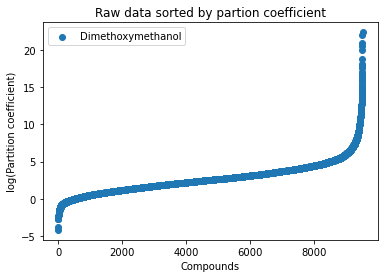

In [21]:
plt.xlabel("Compounds")
plt.ylabel("log(Partition coefficient)")
plt.title("Raw data sorted by partion coefficient")
plt.scatter(x_plot, raw_dataset.iloc[:,1], label=("Dimethoxymethanol"))
plt.legend();

In general some featurizer only accept float or integer as input format. Hence, we generalize the input and translate it to an integer, which accepted by most of the featurizer functions. Based on the dataset accuracy a multiplier is chosen. In our case a multiplier of 10$^6$ is selected. The array of KF-values then can be easily translated as it is shown in the following.  

In [7]:
Multiplier=1e6
y = raw_dataset.iloc[:, 1] * Multiplier
y = np.array(y).astype("int")

In the next step we use the RDKitDescriptor featurizer function from the package deepchem to describe our molecules. Here, the input are smile strings, which are then converted to an array comprising several physical information of the molecule. Special for this method is that the algorithm calculates some molecule properties based on the smiles string. This algorithm describes the molecule very well and furthermore it can be uniquely identified. The features are then converted to an integer as we did this with KF-Value. 

In [8]:
feater = dc.feat.RDKitDescriptors()
X_raw = raw_dataset.iloc[:, 0]
X = feater.featurize(X_raw)* Multiplier
X_RDKit=np.array(X).astype("int")

From input and output arrays we then create a dataset which can be used to fit in the machine learning algorithm. For the following fit we are using the NumpyDataset which accepts arrays. To test the fit of the algorithm it is always of advantage to have a train dataset and test dataset. The test dataset can then be used to evaluate the performance of the algorithm. Here, we split the dataset in 80% train dataset and 20% in test dataset. If the dataset is sorted as we did before the test dataset should be randomized over the whole dataset, since it should be representative for the dataset. In order to be random but always show similar results the seed of the random function of numpy is set to an abritrary number. We here have chosen the molecular weight of DMM. 

In [9]:
np.random.seed(76)

If the algorithm should only estimate values inside the train dataset it is also possible to train and test with the whole dataset. This is only performed in very special cases. Hence, we split the dataset into train and test datasets. 

In [10]:
dataset_RDKit = dc.data.NumpyDataset(X_RDKit, y)
splitter=dc.splits.RandomSplitter()
train_dataset_RDKit , test_dataset_RDKit = splitter.train_test_split(dataset_RDKit)

### Modeling

Modeling can be done with different methodologies. Not necessarily one of the best known but one of the easiest to present is Random Forest Modeling. This method is based on a tree diagram which leads to different branches to either regress data or to classify.

![Baumdiagramm.png](Baumdiagramm.png)
**Figure 2: Tree decision diagram. Decision layer are labeled in the order from the top to the bottom**</br>
In the tree decision the algorithm searches for features of the dataset which characterize the dataset. The decisions are made at nodes e.g. if the molecular weight of a compound is in a certain range. Based on the criteria each component is then directed via a branch to the next node. 
For more features the algorithm will take more time to evaluate the dataset and fit the model. The featurizer RDKitDescriptor featurizes the smile strings in 208 charactistics for each component. We already investigated the structure and found severals characteristics which  in the first step we will check if less characteristics are efficient enough to evaluate the model.
To now fit the model we select a model which is used by the fitting algorithm. In this case we use the random forest regression. We can also simply check the score of the training dataset by evaluation of the model with the test dataset. The result is on the one hand the R$^2$-Score as well as the time to fit the model. 


In [11]:
start_time = time.time()
model_0 = dc.models.SklearnModel(RandomForestRegressor(random_state = 0))
model_0.fit(train_dataset_RDKit)
train_scores_0 = model_0.evaluate(test_dataset_RDKit, [dc.metrics.Metric(dc.metrics.r2_score)])
print(train_scores_0, "It took", np.around(time.time() - start_time,0), "seconds to fit")

{'r2_score': 0.9380908168584553} It took 33.0 seconds to fit


In addition to the imported data we can also inspect the features which are generated by the RDKitDescriptor. So from column nine on the values are 0 and give no additional information about the component. Which is good to know as we will see in the following modeling chapter. The main reason to take a look in the features is to investigate the structure and to further simplify the features. For small datasets this may be not necessary because the algorithm converges fast but for larger datasets this will save computational time. The imported data is sorted by the water column and the existing data structure is previewed. This is often advantageous if we have not created the data set ourselves.
The RDKit Descriptor comes with a total of 208 identifiers for each component, which can lead to a long time to fit the total dataset. In the present case we only fit to 1 output variable namely the partition coefficient of dimethoxymethanol. If the number of output variables increase the fitting will take quite a time. Hence, sometimes it is necessary to decrease the fitting time and the highest influence comes from the input variables. The influence of the input variables can be  investigated by increasing the amount of input variables. We will create a for loop where the amount of input variables is increased. For the RDKit Descriptor the most important identifier come first. Therefore, the amount of input variables starts from the first entry of the input variable and continues to 80 entries.


In [12]:
# Define output variables
Score_Feat = []
Time_Feat = []
Datasetlength = []
# Parameter
Stepsize = 5
Stepplot = 10
for i in range(1,80,Stepsize):
    #Set train and test dataset
    train_dataset_0 = dc.data.NumpyDataset(train_dataset_RDKit.X[:,0:i], train_dataset_RDKit.y)
    test_dataset_0 = dc.data.NumpyDataset(test_dataset_RDKit.X[:,0:i], test_dataset_RDKit.y)    
    model = dc.models.SklearnModel(RandomForestRegressor(random_state = 0))
    start_time = time.time()
    # Fit trained model
    model.fit(train_dataset_0)
    
    train_scores = model.evaluate(test_dataset_0, [dc.metrics.Metric(dc.metrics.r2_score)])
    # Save variables
    Datasetlength.append(i)
    Score_Feat.append(train_scores["r2_score"])
    Time_Feat.append(np.around(time.time()-start_time,3))
    
predictions = model.predict(test_dataset_0)

The loop is to increase the number of features in the dataset. In the model fit function the algorithm tries to fit the model with the given parameter. If no parameters are given the solver choses the default values. The model is then evaluated by the test dataset with the metrics of the R$^2$ scoring. For each amount of features the score and the solver time is given. The higher the amount of features the higher is the time fit the model. Surprisingly, already 10 features of the RDKitDiscriptor are enough to reach a score of roughly 0.85.

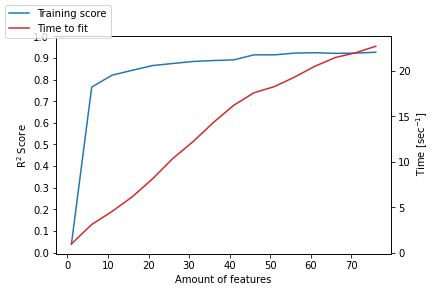

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(Datasetlength,Score_Feat,label = "Training score", color='C0')
ax2.plot(Datasetlength,Time_Feat,label = "Time to fit", color="C3");
ax1.set_xlabel('Amount of features')
ax1.set_ylabel("R$^2$ Score")
ax1.set_yticks(np.arange(0,1.01,0.1))
ax2.set_ylabel(" Time [sec$^{-1}$]")
fig.legend(loc = 2);

This example shows that usually the time to fit scales linearly with the amount of features at least for the random forest regression. The R$^{2}$-Score on the other side approaches a maximum value. For the present dataset and the RDKitDescriptor the R$^{2}$-Score is around 0.93. In general the decision between time to fit and the accuracy of the fit is a choice of the application the model is made for. For cases where the fit is only done once and from then on, of course the time to fit is of secondary importance and the accuracy of the fit is really important. For more dynamic use-cases in which the fit is done iteratively the time to fit plays a more important role and the accuracy of the fit will increase with each iteration. In the end, the decision is left to the user and we want to show a methology to test different cases.

In the next step we will compare the predicted data and the data from the training set. We can do an easy plot which plots the predicted value over the real value. Since we used a multiplier for the conversion in to integer we will divide by the multiplier to compare the predicted and real data.

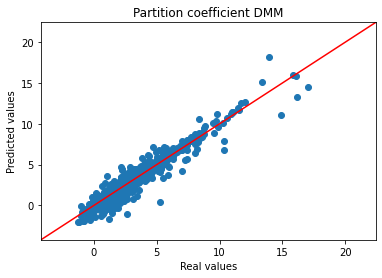

In [14]:
# Estimation of the model made visual.
# We plot the prediction over the real data so everything on the line y=x is estimated correctly.
y_min = min(y/Multiplier)
y_max = max(y/Multiplier)
plt.scatter(predictions/Multiplier,test_dataset_0.y/Multiplier)

plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Partition coefficient DMM")
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.plot([y_min, y_max],[y_min, y_max],"r")
plt.savefig("Predicted_vs_Real_DMM")

In the previous steps we assumed that the featurizer is the best for our case, but the Deepchem package delivers a few more featurizers which work sometimes better with certain algorithms or sometimes describe the important information of cases better than others. Hence, testing different featurizers and their performance with the current model is a good way to a good fitting model. So we import featurizer methods from the deepchem package and convert the SMILES to different encodings. We also will create the train and test datasets for the evaluation of the featurizer methods. 

In [15]:
# We try two more featurizer
feater_MACCS = dc.feat.MACCSKeysFingerprint()  # MaccsKeysFingerprints
feater_CF = dc.feat.CircularFingerprint() # Circular Fingerprints

X_Test_MACCS = feater_MACCS.featurize(X_raw)
X_Test_CF = feater_CF.featurize(X_raw)
# Create datasets 
dataset_MACCS = dc.data.NumpyDataset(X_Test_MACCS,y)
dataset_CF = dc.data.NumpyDataset(X_Test_CF,y)
# Create test and train datasets
splitter = dc.splits.RandomSplitter()
train_dataset_MACCS , test_dataset_MACCS = splitter.train_test_split(dataset_MACCS)
train_dataset_CF , test_dataset_CF = splitter.train_test_split(dataset_CF)

We did now featurize the SMILES in different ways. The shape of the features varies. As we already saw in the RDKitDescriptor some of the feature criteria are not fulfilled and do not affect the fit anymore. The different features will now be fitted to the random forest regression model. The accuracy of the fit and also the time to evaluate the model are two criteria which can be compared to choose a method for the final model. 

In [16]:
sklearn_model = RandomForestRegressor(random_state = 0)
model = dc.models.SklearnModel(sklearn_model)
regression_metric = dc.metrics.Metric(dc.metrics.r2_score)
# We define a list with the names of the featurizer
Listnames = ["RDKit Descriptor", "MACCS Fingerprints", "Circular Fingerprints"]
# We create a set of different dataset which iterable 
Train_List = (train_dataset_RDKit,train_dataset_MACCS,train_dataset_CF)
Test_List = (test_dataset_RDKit,test_dataset_MACCS,test_dataset_CF)
# Output variables
train_score = []
time2fit = []
prediction_feat = []
for i,train_datasetnames in enumerate(Train_List):
    start = time.time()
    # Fit the model to the dataset 
    model.fit(train_datasetnames)
    train_scores_0 = model.evaluate(Test_List[i], [regression_metric])
    time2fit.append(time.time()-start)
    # Check the training scores
    train_score.append(train_scores_0["r2_score"])
    prediction_feat.append(model.predict(Test_List[i]))

We now test the random forest regression with different featurized datasets


It seems that our first choice of the featurizer was quite good. Despite it is not the fastest method it has the highest score which makes the model more predictable. Maybe if the model should be very dynamic the MACCS Fingerprints could be the first choice. Circular fingerprints seem to be very slow and inaccurate with the present dataset.  

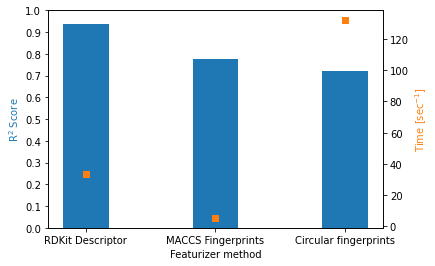

In [17]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.scatter(Listnames,time2fit,color = "C1",marker = "s")
ax1.bar(Listnames,train_score,0.35, color = "C0");
ax1.set_xlabel("Featurizer method");
ax1.set_yticks(np.arange(0,1.01,0.1))
ax1.set_ylabel("R$^2$ Score", color = "C0");
ax2.set_ylabel("Time [sec$^{-1}$]", color = "C1");

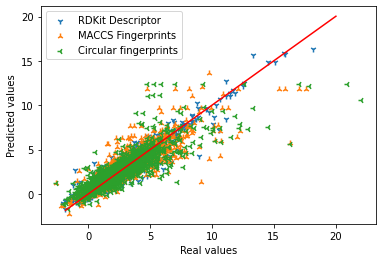

In [18]:
# Define min and max of the dataset 
y_min = min(test_dataset_RDKit.y/Multiplier)*0.9
y_max = max(test_dataset_RDKit.y/Multiplier)*1.1

plt.plot([y_min,y_max],[y_min,y_max],"r")
for i, testdataname in enumerate(Test_List):
    plt.scatter(testdataname.y/Multiplier,prediction_feat[i]/Multiplier,marker = str(i+1), label = Listnames[i])
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.legend();

The scatter of the different featurizers is very small in a range of small partition coefficients and scatters significantly more for larger partition coefficients. For the present dataset RDKit Descriptor seems to present the data the best since its method also introduce physical properties like molecular weigth. 
At last we want to show how you can now import a SMILES structure and predict a partition coefficient of a component. The SMILES of the component toluene we define as string. It is featurized with the RDKit Featurizer and the model without any modification is used. However for the prediction the predict function only accepts numpy datasets which can also be converted. 

In [20]:
X_Toluene = np.array(feater.featurize("CC1=CC=CC=C1")* Multiplier).astype("int")
print(model_0.predict(dc.data.NumpyDataset(X_Toluene, [0]))/Multiplier)

[3.15219731]


We calculated the partition coefficient of DMM in the two phases of water and toluene which we predict to be 3.15 compared to the real value of 3.09 it only shows a deviation of 2%.

## Conclusion

Molecules as 3 dimensional objects have to be described as a machine readible object. We presented some of the most important methods in this paper such as SMILES. SMILES are a string based description of a molecule and are widely spread in different research fields. Based on the SMILES description we took a look into featurizer methods to make those smiles machine readible. Those featurizer methods performed different in their fitting performance as well in the speed of fitting datasets.  In addition, we presented an example for the structural investigation of fitting data into Machine Learning algorithms and showed how to use them.

## Acknowledgement

This work was performed as part of the Cluster of Excellence Fuel Science Center (EXC 2186) funded by the Excellence Initiative by the German federal and state governments to promote science and research at German universities.

## Supporting information

The source code can be found on the git server of RWTH University under https://git.rwth-aachen.de/palkovits/encodings2021_sourcecode.

## Literature
[1] S. Palkovits, R. Palkovits, ACS Catal. 2019, 9, 9, 8383–8387 </br>
[2] S. Palkovits, ChemCatChem 2020, 12, 3995–4008 </br>
[3] G. A. Pinheiro, J. Mucelini, M. D. Soares, R. C. Prati, J. L. F. Da Silva, M. G. Quiles, J. Phys. Chem. A 2020, 124, 47, 9854–9866 </br>
[4] M. Krenn, F. Häse, A. Nigam, P. Friedrich, A. Aspuru-Guzik, Mach. Learn.: Sci. Technol. 2020, 1, 045024 </br>
[5] S. Kearnes, K. McCloskey, M. Berndl, V. Pande, P. Riley, J. Comput.-Aided Mol. Des. 2016, 30, 595−608 </br>
[6] D.K. Duvenaud, D. Maclaurin, J. Iparraguirre, R. Bombarell, T. Hirzel, A. Aspuru-Guzik, R.P. Adams, Adv. Neural Inf. Process. Syste. 2015, pp 2224–2232 </br>
[7] S. Jaeger, S. Fulle, S. Turk, J. Chem. Inf. Model. 2018, 58, 27−35 </br>
[8] M. Rupp, A. Tkatchenko, K.R. Müller, O. A. v. Lilienfeld, Phys. Rev. Lett. 108 2012, 058301 </br>
[9] J. Schrier, J. Chem. Inf. Model. 2020, 60, 8, 3804–3811 </br>
[10] N.J. Lentelink, S. Palkovits, Adv. Theory Simul. 2020, 3, 2000148 </br>
[11] K. Hansen, F. Biegler, R. Ramakrishnan, W. Pronobis, O. A. v. Lilienfeld, K.R. Müller, A. Tkatchenko, J. Phys. Chem. Lett. 2015, 6, 12, 2326–2331 </br>
[12] D. Weininger, J. Chem. Inf. Comput. Sci. 1988, 28, 31–6 </br>
[13] D. Rogers, M. Hahn, J. Chem. Inf. Model. 2010, 50(5), 742–754 </br>
[14] R. C. Glem, A. Bender, C. H. Arnby, L. Carlsson, S. Boyer, J. Smith, IDrugs 2006, 9(3), 199–204</br>
[15] H.L. Morgan, J. Chem. Doc. 1965, 5(2), 107–113 </br>
[16] G. Landrum, 2006, https://www.rdkit.org/ </br>
[17] A.T. Balaban, J Chem. Inf. Comput. Sci. 1985, 25, 334-343 </br>
[18] J.S. Delaney, J. Chem. Inf. Comput. Sci. 2004, 44, 3, 1000–1005 </br>
[19] T. Mikolov, I. Sutskever, K. Chen, G.S Corrado, J. Dean, Adv. Neural Inf. Process. Syst. 2013, 26 </br>
[20] Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., . . . Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357-362. doi:10.1038/s41586-020-2649-2 </br>
[21] Ramsundar, B., Eastman, P., Walters, P., & Pande, V. (2019). Deep learning for the life sciences: applying deep learning to genomics, microscopy, drug discovery, and more: " O'Reilly Media, Inc.". </br>
[22] Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95. doi:10.1109/MCSE.2007.55 </br>
[23] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., . . . Dubourg, V. J. t. J. o. m. L. r. (2011). Scikit-learn: Machine learning in Python. 12, 2825-2830. </br>
[24] team, T. p. d. (2020). pandas-dev/pandas: Pandas: Zenodo. </br>
[25] Klamt, A. (1995). Conductor-like Screening Model for Real Solvents: A New Approach to the Quantitative Calculation of Solvation Phenomena. The Journal of Physical Chemistry, 99(7), 2224-2235. doi:10.1021/j100007a062 </br>
[26] Klamt, A., & Schuurmann, G. (1993). COSMO: a new approach to dielectric screening in solvents with explicit expressions for the screening energy and its gradient. Journal of the Chemical Society, Perkin Transactions 2(5), 799-805. doi:10.1039/P29930000799 </br>
